In [16]:
!pip install xgboost

In [19]:
import pandas as pd     
import math as m
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline                
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor                     
from sklearn.compose import ColumnTransformer        
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error          
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [21]:
df=pd.read_csv(r"C:\Users\KRITH\OneDrive\Documents\website\AI project\Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [13]:
values = df['Job Title'].value_counts().nlargest(15).values
index = df['Job Title'].value_counts().nlargest(15).index



In [11]:
print(values)

[12 11 10  9  9  8  7  7  7  7  7  6  6  6  5]


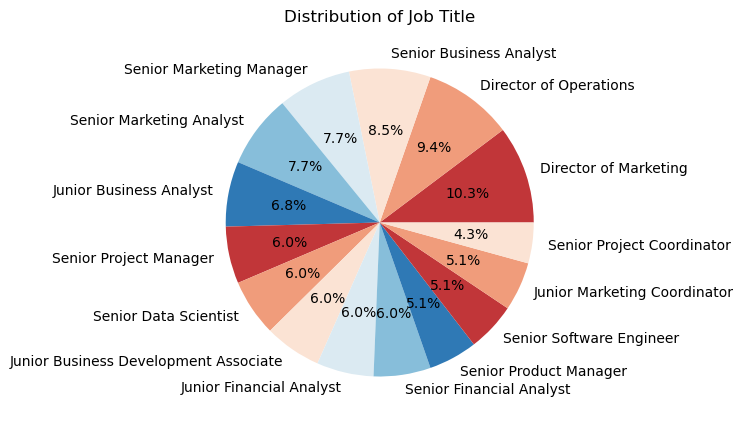

In [23]:
color = sns.color_palette('RdBu')
plt.figure(figsize=(7,5))

plt.title('Distribution of Job Title')
plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
plt.show()

In [24]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(50)

In [26]:
df.drop_duplicates(inplace = True)

In [27]:
object_data = df.select_dtypes(include = 'object')
for column in object_data.columns:
    print('column ',df[column].mode()[0])
    df[column].fillna(df[column].mode()[0],inplace = True)

column  Male
column  Bachelor's
column  Director of Operations


C:\Users\KRITH\AppData\Local\Temp\ipykernel_5868\3136764230.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace = True)


In [28]:
numeric_data = df.select_dtypes(exclude = 'object')
for column in numeric_data.columns:
    print(column,df[column].mean(),df[column].median())
    df[column] = df[column].fillna(df[column].median())

Age 37.382716049382715 36.5
Years of Experience 10.058641975308642 9.0
Salary 99985.64814814815 95000.0


In [29]:
for column in object_data.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    print(le.classes_)

['Female' 'Male']
["Bachelor's" "Master's" 'PhD']
['Account Manager' 'Accountant' 'Administrative Assistant'
 'Business Analyst' 'Business Development Manager'
 'Business Intelligence Analyst' 'CEO' 'Chief Data Officer'
 'Chief Technology Officer' 'Content Marketing Manager' 'Copywriter'
 'Creative Director' 'Customer Service Manager' 'Customer Service Rep'
 'Customer Service Representative' 'Customer Success Manager'
 'Customer Success Rep' 'Data Analyst' 'Data Entry Clerk' 'Data Scientist'
 'Digital Content Producer' 'Digital Marketing Manager' 'Director'
 'Director of Business Development' 'Director of Engineering'
 'Director of Finance' 'Director of HR' 'Director of Human Capital'
 'Director of Human Resources' 'Director of Marketing'
 'Director of Operations' 'Director of Product Management'
 'Director of Sales' 'Director of Sales and Marketing' 'Event Coordinator'
 'Financial Advisor' 'Financial Analyst' 'Financial Manager'
 'Graphic Designer' 'HR Generalist' 'HR Manager' 'Help D

In [19]:
df.corr()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
Age,1.000000,-0.025358,0.540180,0.118804,0.979191,0.916545
Gender,-0.025358,1.000000,-0.026629,0.035267,-0.001832,0.075013
Education Level,0.540180,-0.026629,1.000000,0.116060,0.573754,0.661544
Job Title,0.118804,0.035267,0.116060,1.000000,0.105868,0.136005
Years of Experience,0.979191,-0.001832,0.573754,0.105868,1.000000,0.924454
Salary,0.916545,0.075013,0.661544,0.136005,0.924454,1.000000


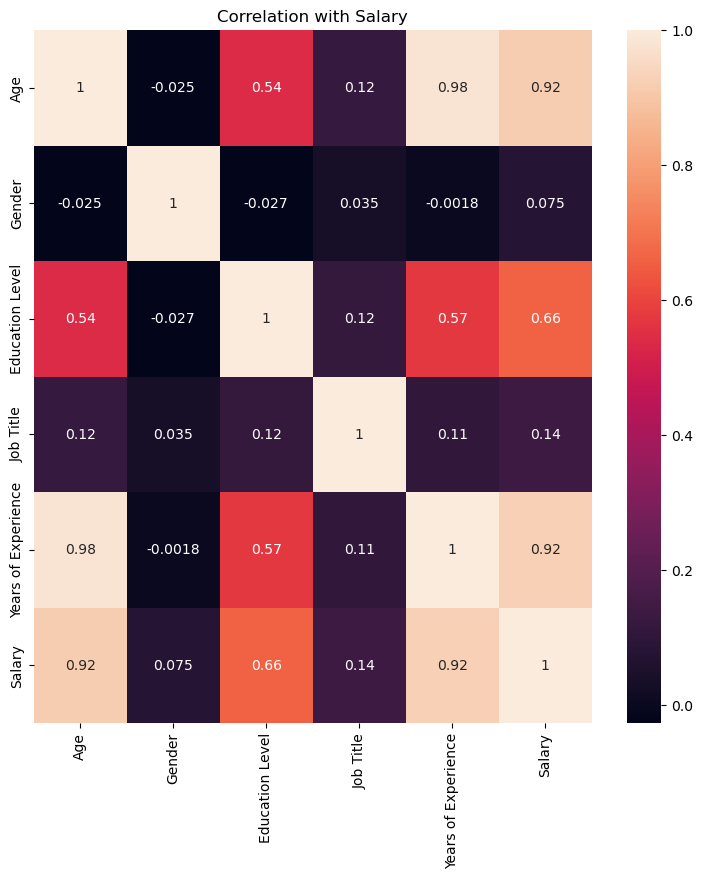

In [30]:
plt.figure(figsize=(9,9))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation with Salary")
plt.show()

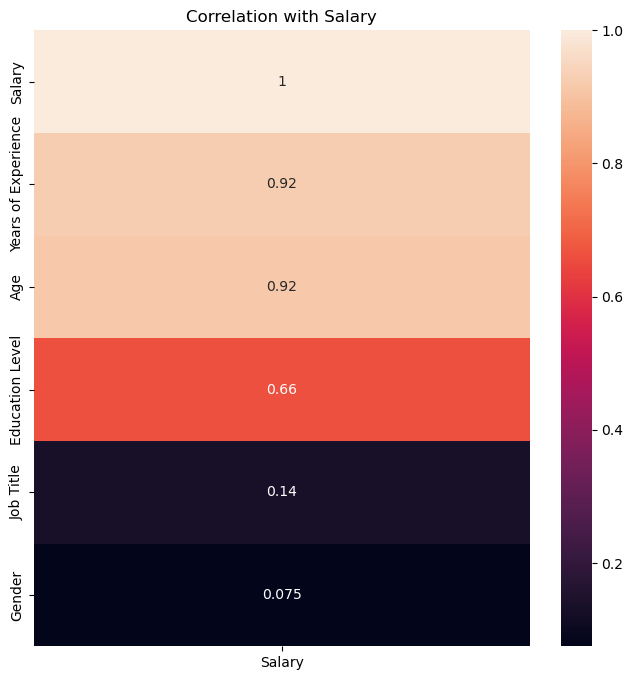

In [31]:
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(correlation[['Salary']].sort_values(by='Salary', ascending=False), annot=True)
plt.title("Correlation with Salary")
plt.show()

In [32]:
x =df.drop('Salary',axis = 1)
y = df['Salary']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x_train

,Age,Gender,Education Level,Job Title,Years of Experience
172,36.5,1,0,30,9.0
183,27.0,1,0,69,2.0
17,39.0,1,2,116,12.0
24,41.0,1,1,37,13.0
132,40.0,0,1,154,12.0
...,...,...,...,...,...
188,50.0,0,2,33,22.0
71,39.0,0,0,98,11.0
106,30.0,0,0,20,3.0
283,29.0,0,0,50,1.5


In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
model = LinearRegression()

R2 Score =  93.48%
Mean Absolute Error =  9301.646444075777
Mean Squared Error =  148883434.17611033
Root Mean Squared Error =  12201.779959338322


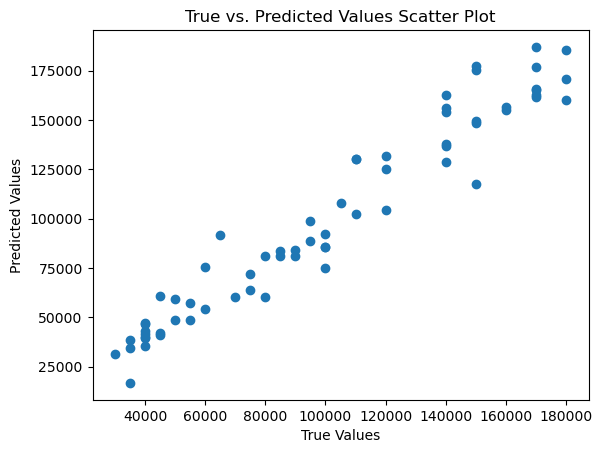

In [37]:
model.fit(x_train,y_train) 
 

y_predict = model.predict(x_test)

print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
 

plt.scatter(y_test,y_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")


plt.title("True vs. Predicted Values Scatter Plot")


plt.show()

In [38]:
model_2 =  XGBRegressor()


R2 Score =  94.58%
Mean Absolute Error =  8255.630408653846
Mean Squared Error =  123815484.41507193
Root Mean Squared Error =  11127.24064694711


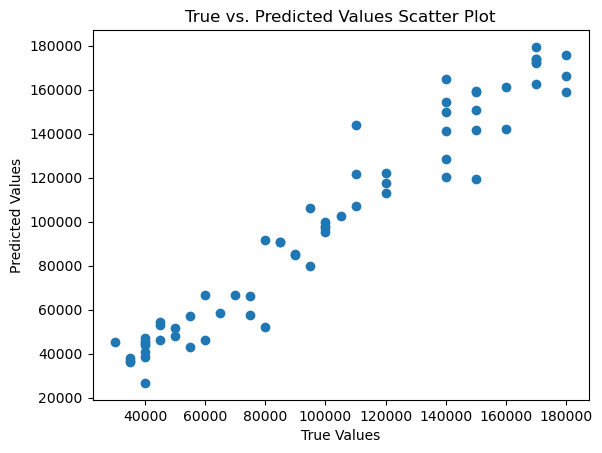

In [39]:
model_2.fit(x_train,y_train) 
 
y_predict = model_2.predict(x_test)

print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
 

plt.scatter(y_test,y_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")


plt.title("True vs. Predicted Values Scatter Plot")


plt.show()